### **Bidirectional RNN**

Bi-Directional RNN is an advanced form of Recurrent Neural Networks that helps in processing the sequential data in both forward and backward direction.

### **Types of Bidirectional RNN:-**

1.  Forward RNN ----> It is a kind of RNN that helps in processing of the  sequential information from left to the right.

2.  Backward RNN ---> It is a kind of RNN that helps in the processing of the sequential information from the right to the left.

### **Importance of Bidirectional RNN :-**

1.  It helps in the processing of sequential information in both the forward and backward direction.

2.  It is used in sentimental analysis where it captures the meaning behing every input text sequence.

3. It is used in Named Entity Recognition where it identifies the valid names of every entity by understanding the context behing every text.

4.  It is used in Machine Translation where it first understands the entire meaning behind the text and then it translates the text.

5.  It is used in speech recognition where it captures the full meaning behind the text and then it recognises the speech.

6. It is used in the text classification where it understands the full meaning behind the text and then classifies the text.



### **Steps used in this Algorithm for implementing the Sentiment Project Analysis using Bidirectional RNN :-**

1.   Import all the necessary libraries

2.   Load the imdb movie dataset

3.   Perform the padding on the input sequences of Bidirectional RNN

4.   Build the Bidirectional RNN Model

5.   Compile the Bidirectional RNN Model

6.   Train the Bidirectional RNN Model

7.   Evaluate the Bidirectional RNN Model

8.   Plot Accuracy & Loss

9.   Make Predictions on the Custom Text data


### **Dataset Description :-**

1.   The imdb movie review dataset contains 50000 labelled reviews .

2.   From that , the imdb movie review dataset contains 25000 training labelled reviews and 25000 testing labelled reviews.


### Step 1: Import all the necessary libraries

In [150]:
import  numpy              as   np
import  pandas             as   pd
import  matplotlib.pyplot  as  plt
import  seaborn            as  sns

import  tensorflow         as  tf

from    tensorflow.keras.datasets                import    imdb
from    tensorflow.keras.models                  import    Sequential
from    tensorflow.keras.preprocessing.sequence  import    pad_sequences
from    tensorflow.keras.layers                  import    Dense, Dropout, BatchNormalization, Bidirectional, SimpleRNN, Embedding, LSTM

### **OBSERVATIONS:**

  1.  numpy --------------> Computation of the numerical array
  
  2.  pandas --------------> Data Creation and Manipulation
  
  3.  matplotlib -----------> Data Visualization
  
  4.  seaborn -------------> Data Correlation
  
  5.  tensorflow -----------> Deep Learning Framework
  
  6.  imdb -------------> Movie Review dataset that has 50000 labels
  
  7.  pad_sequences --------> makes all the input sequences of equal length

  8.   Sequential -----------> forms linear stacks of layers
   
  9.   Embedding -----------> It forms the embedding layer of RNN by converting the integer encoded words into the dense vectors.
  
10.   SimpleRNN  ----------->
  
    .   It forms a simple Recurrent Neural Network and helps in the processing of the sequential information from the left to the right.

    .  It takes one word, processes it and captures its importance and moves forward to process the next information.

11.   Bidirectional --------------->

    .  It helps in the processing of the sequential information in both the directions from left to the right and from right to the left.

    .  It captures the  meaning behind the entire text by capturing the past and the future event for every word in the sequence.

12.  Flatten -------------> converts the 2D / 3D feature maps into 1D vectors.
  
13.  Dense -------------> forms the dense neural network model
  
14.  Dropout ------------> Reduces the overfitting
  
15.  BatchNormalization ---------> normalized the activation




### Step 2: Load the imdb movie dataset

In [151]:
from tensorflow.keras.datasets  import   imdb


### define the vocabulary size

voc_size = 10000

### split the data into training and testing data

(X_train, Y_train),(X_test, Y_test) = imdb.load_data(num_words=voc_size)

###**Input Data:**

In [152]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [153]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [154]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (25000,)
Shape of the input testing  data is: (25000,)


###**Output Data:**

In [155]:
Y_train

array([1, 0, 0, ..., 0, 1, 0])

In [156]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [157]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (25000,)
Shape of the output testing  data is: (25000,)


**OBSERVATIONS:**

1. The imdb movie review dataset is loaded and it contains top 10000 most frequent words in it.

2. Then the imdb data is divided into training and testing data.

3.  It has 25000 training labelled reviews and 25000 testing labelled reviews.

4.  The input data has 25000 reviews. But each review has uneven input sequences(All the input sequences are of unqual length)

5. To make all the input sequences with equal length, padding is needed.

### Step 3: Perform the padding on the input sequences of Bidirectional RNN

In [158]:
### perform the padding on the input

max_len = 200

X_train = pad_sequences(X_train, maxlen=max_len)

X_test  = pad_sequences(X_test, maxlen=max_len)

In [159]:
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [160]:
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [1987,    2,   45, ...,  125,    4, 3077],
       [4468,  189,    4, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [161]:
print("Shape of the input training data after padding:", X_train.shape)
print("Shape of the input testing  data after padding:", X_test.shape)

Shape of the input training data after padding: (25000, 200)
Shape of the input testing  data after padding: (25000, 200)


###**OBSERVATIONS:**

1. After performing padding on the input data, it is seen that all the input sequences of the training and testing data have the same length of 200.

2. Padding is done on the input as the Bidirectional RNN Model can only work with the fixed length input sequence.

3. Padding is of two types:-

   (a.)  Pre-padding ----------->  Adding zeros at the beginning of the input sequence.

   (b.)  Post-padding ----------> Adding zeros at the end of the input sequence.

### Step 4:  Build the Bidirectional RNN Model

In [162]:
### Construct the Bidirectional RNN with Simple RNN

bidirectional_simplernn_model = Sequential([
    ### Create a simple Embedding layer
    Embedding(input_dim = 10000, output_dim = 126, input_length = max_len)                           ,
    ### Create the Bidifrectional RNN with Simple RNN
    Bidirectional(SimpleRNN(64))                                                                     ,
    ### Create the output layer with 1 hidden neuron  to predict whether the movie review is positive or negative
    Dense(1, activation= 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [163]:
### Construct the Bidirectional RNN with LSTM Model

bidirectional_lstm_model = Sequential([
    ### Create the Embedding layer
    Embedding(input_dim=10000, output_dim=128, input_length = max_len)                               ,
    ### Create the Bidirectional RNN with LSTM
    Bidirectional(LSTM(64))                                                                          ,
    ### Create the output layer
    Dense(1, activation = 'sigmoid')
])

### **OBSERVATIONS:**

1.  Bidirectional RNN with Simple RNN is used with the shorter text sequences  whereas Bidirectional RNN with LSTM is used with the longer text sequences

2.  Bidirectional RNN with Simple RNN is used there is no memory control mechanism but Bidirectional RNN with LSTM is used when it has memory control mechanism.

3.  Bidirectional RNN with Simple RNN is used  when there is no solution for Vanishing gradient descent but Bidirectional RNN with LSM is used when it can handle Vanishing Gradient descent.

In [164]:
### get the summary for both the models

bidirectional_simplernn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [165]:
bidirectional_lstm_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 5: Compile the Bidirectional RNN Model

In [166]:
### Compile both the models

bidirectional_simplernn_model.compile(
    optimizer         =           'adam'                                ,
    loss              =           'binary_crossentropy'                 ,
    metrics           =           ['accuracy']
)

In [167]:
bidirectional_lstm_model.compile(
    optimizer         =           'adam'                                ,
    loss              =           'binary_crossentropy'                 ,
    metrics           =           ['accuracy']
)

**OBSERVATIONS:**

The RNN Model has been made ready for the training with the help of the following parameters:-


(a.) optimizer = 'adam' -----> It optimizes the weights during the training of the model.

(b.) loss = 'binary_cossentropy' -----> It is used to solve the binay classification poblem

(c.) metrics = ['accuracy'] -------> It is used to evaluate the performance of the model.

### Step 6: Train the Bidirectional RNN Model

#### **a.  Train the bidirectional with Simple RNN Model:**

In [168]:
history1 = bidirectional_simplernn_model.fit(
    X_train                                         ,
    Y_train                                         ,
    epochs               =             5            ,
    batch_size           =             64           ,
    validation_split     =             0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 140ms/step - accuracy: 0.6169 - loss: 0.6349 - val_accuracy: 0.7944 - val_loss: 0.4777
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.8336 - loss: 0.3857 - val_accuracy: 0.8128 - val_loss: 0.4282
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - accuracy: 0.9166 - loss: 0.2245 - val_accuracy: 0.6376 - val_loss: 0.6876
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.9012 - loss: 0.2495 - val_accuracy: 0.8018 - val_loss: 0.5354
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 142ms/step - accuracy: 0.9802 - loss: 0.0673 - val_accuracy: 0.8092 - val_loss: 0.6339


#### **b.  Train the bidirectional with LSTM Model:**

In [169]:
history2 = bidirectional_lstm_model.fit(
    X_train                                        ,
    Y_train                                        ,
    epochs               =             5           ,
    batch_size           =             64          ,
    validation_split     =             0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 415ms/step - accuracy: 0.6961 - loss: 0.5602 - val_accuracy: 0.8516 - val_loss: 0.3463
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 423ms/step - accuracy: 0.8928 - loss: 0.2767 - val_accuracy: 0.8696 - val_loss: 0.3218
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 413ms/step - accuracy: 0.9182 - loss: 0.2174 - val_accuracy: 0.8594 - val_loss: 0.3499
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 415ms/step - accuracy: 0.9503 - loss: 0.1401 - val_accuracy: 0.8636 - val_loss: 0.3599
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 417ms/step - accuracy: 0.9690 - loss: 0.0972 - val_accuracy: 0.8612 - val_loss: 0.4628


**OBSERVATIONS:**


The Bidirectional RNN with SimpleRNN and LSTM Model has been trained with the help of the following parameters:-

(a.) Training data -------> X_train, Y_train

(b.) epochs = 5 ---------> 5 iterations ae needed to train the model

(c.) batch_size = 64 -----> weights get updated after every 64 samples

(d.) validation_split = 0.2 ----> 20 % of the data is used fo validation.

After the model training, the accuracy of both the model has increased while the loss function has reduced. So the model is working completely fine.

### Step 7: Evaluate the Bidirectional RNN Model

In [170]:
loss1, acc1 = bidirectional_simplernn_model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {acc1:.4f}")

print(f"Test Loss: {loss1:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8055 - loss: 0.6520
Test Accuracy: 0.8056
Test Loss: 0.6484


In [171]:
loss2, acc2 = bidirectional_lstm_model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {acc2:.4f}")

print(f"Test Loss: {loss2:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8536 - loss: 0.4842
Test Accuracy: 0.8529
Test Loss: 0.4896


### **OBSERVATIONS:**

1.    After evaluating the RNN Model with the test data, it is known that the test accuracy of the model is very high while the loss function is very less.

2.    So the model is completely fine.


3.    After evaluating both the bidirectional models, we came to the conclusion that the test accuracy for bidirectional with LSTM RNN is performing well as compared to the Simple RNN.

### Step 8:  Plot Accuracy & Loss


###**(a.)  Bidirectional with Simple RNN Model:**

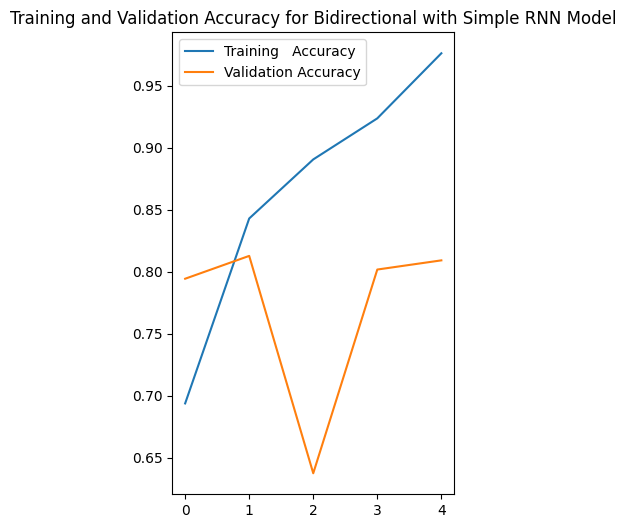

In [172]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'],     label = 'Training   Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Bidirectional with Simple RNN Model')
plt.legend()
plt.show()

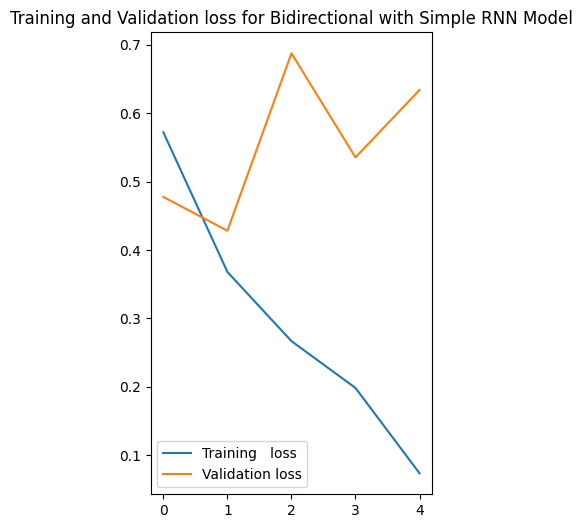

In [173]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,2)
plt.plot(history1.history['loss'],     label = 'Training   loss')
plt.plot(history1.history['val_loss'], label = 'Validation loss')
plt.title('Training and Validation loss for Bidirectional with Simple RNN Model')
plt.legend()
plt.show()

###**(a.)  Bidirectional with LSTM Model:**

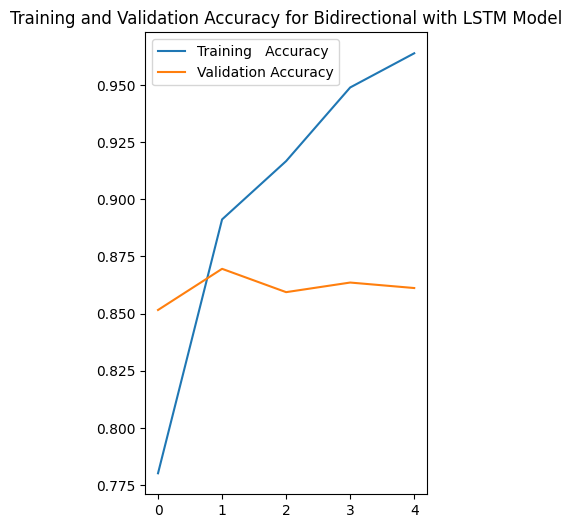

In [174]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'],     label = 'Training   Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Bidirectional with LSTM Model')
plt.legend()
plt.show()

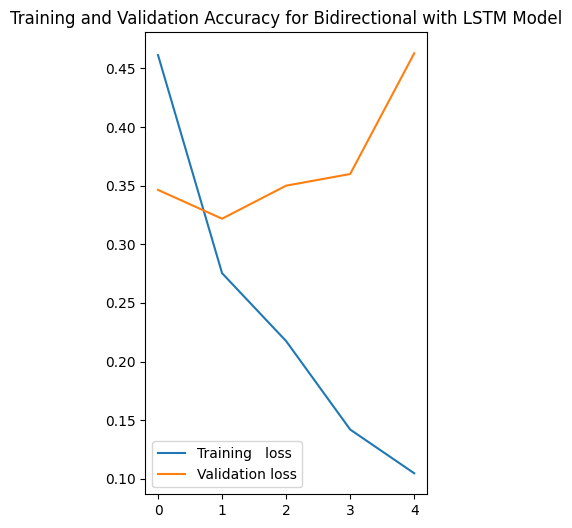

In [175]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,2)
plt.plot(history2.history['loss'],     label = 'Training   loss')
plt.plot(history2.history['val_loss'], label = 'Validation loss')
plt.title('Training and Validation Accuracy for Bidirectional with LSTM Model')
plt.legend()
plt.show()

**OBSERVATIONS:**

1.   This code visualizes model performance after training using the history objects of both the models for the Accuracy and loss.

2.    It depicts about the training and Validation accuracy as well as for loss and Validation loss.

### Step 9: Make Predictions on the Custom Text data

###**(a.) Bidirectional with SimpleRNN Model:**

In [176]:
### Get the index of each and every word

word_index = imdb.get_word_index()

### define the function to encode the words into integers
def encoded_review(text):
  ### get the tokens from the text
  tokens = text.lower().split()
  ### check if the token is present in the word index dic if not then assign with 2
  encoded_text = [word_index.get(word,2) for word in tokens]
  ### perform the padding on the encoded text to make all the input sequences as equal length
  encoded_texts = pad_sequences([encoded_text],maxlen=max_len)
  return(encoded_texts)






### define the sample text
sample_text = "This movie was amazing and the actors were brilliant"


res = encoded_review(sample_text)
print(res)

### Make the predictions from the encoded data
predictions = bidirectional_simplernn_model.predict(res)[0][0]
print(predictions)


if(predictions > 0.5):
  print("Positive Review")
else:
  print("Negative Review")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  11  17  13 477   2   1 153
   68 527]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
0.92135817
Positive Review


###**(a.) Bidirectional with LSTM Model:**

In [177]:
### Get the index of each and every word

word_index = imdb.get_word_index()

### define the function to encode the words into integers
def encoded_review(text):
  ### get the tokens from the text
  tokens = text.lower().split()
  ### check if the token is present in the word index dic if not then assign with 2
  encoded_text = [word_index.get(word,2) for word in tokens]
  ### perform the padding on the encoded text to make all the input sequences as equal length
  encoded_texts = pad_sequences([encoded_text],maxlen=max_len)
  return(encoded_texts)






### define the sample text
sample_text = "This movie was amazing and the actors were brilliant"


res = encoded_review(sample_text)
print(res)

### Make the predictions from the encoded data
predictions = bidirectional_lstm_model.predict(res)[0][0]
print(predictions)


if(predictions > 0.5):
  print("Positive Review")
else:
  print("Negative Review")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  11  17  13 477   2   1 153
   68 527]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
0.17469937
Negative Review
